[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.71790102]
 [0.72524919]
 [0.74578625]]


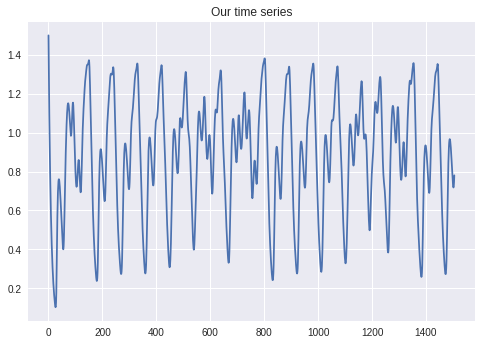

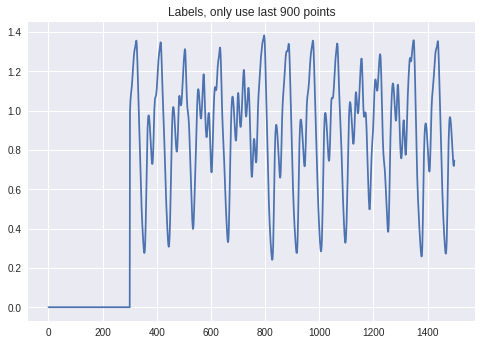

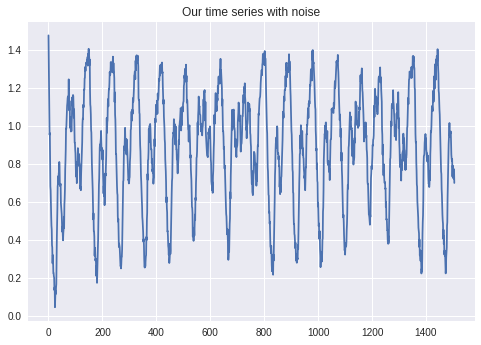

Text(0.5,1,'Labels, only use last 900 points')

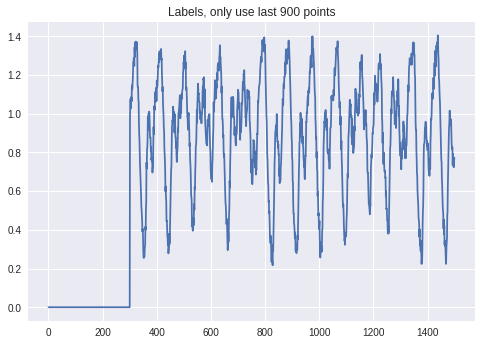

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from matplotlib import cm
import matplotlib.patches as mpatches

##Generate data
stdev=0.03
x_data = np.zeros(1506)
x_data[0]=1.5
x_data_gauss=np.zeros(1506)
x_data_gauss[0]=1.5


for i in range(1505):
  if(i-25>=0):
    x_data[i+1] = x_data[i] + (0.2*x_data[i-25])/(1+x_data[i-25]**10)-0.1*x_data[i]
  else:
    x_data[i+1] = x_data[i]-0.1*x_data[i]

#x_data=x_data*scalefactor
  
y = np.zeros([1500,5])
label = np.zeros(1500)

for k in range(301,1500):

  y[k,0] = x_data[k-20]
  y[k,1] = x_data[k-15]
  y[k,2] = x_data[k-10]
  y[k,3] = x_data[k-5]
  y[k,4] = x_data[k]
  
  label[k] = x_data[k+5] 
  
##  

##DARA WITH GAUSSIAN NOISE

gaussvec = np.random.normal(0,stdev,1506)

x_data_gauss = x_data+gaussvec



#x_data=x_data*scalefactor
  
y_gauss = np.zeros([1500,5])
label_gauss = np.zeros(1500)

for k in range(301,1500):

  y_gauss[k,0] = x_data_gauss[k-20]
  y_gauss[k,1] = x_data_gauss[k-15]
  y_gauss[k,2] = x_data_gauss[k-10]
  y_gauss[k,3] = x_data_gauss[k-5]
  y_gauss[k,4] = x_data_gauss[k]
  
  label_gauss[k] = x_data_gauss[k+5] 
  
label_gauss=np.transpose([label_gauss])
label =np.transpose([label])
#s = np.arange(len(y))
#np.random.shuffle(s)

#y = y[s]
#label = label[s]



print(label)

#SPLIT INTO TRAINING,VALIDATION AND TESTa
training_x = y[300:1000,:]
validation_x = y[1000:1200,:]
test_x = y[1200:1500,:]

training_y = label[300:1000,:]
validation_y = label[1000:1200,:]
test_y = label[1200:1500,:]

training_x_gauss = y_gauss[300:1000,:]
validation_x_gauss = y_gauss[1000:1200,:]
test_x_gauss = y_gauss[1200:1500,:]

training_y_gauss = label_gauss[300:1000,:]
validation_y_gauss = label_gauss[1000:1200,:]
test_y_gauss = label_gauss[1200:1500,:]


#Plotting 
plt.figure(1)
plt.plot(x_data)
plt.title('Our time series')
plt.show()
plt.plot(label)
plt.title('Labels, only use last 900 points')


plt.figure(2)
plt.plot(x_data_gauss)
plt.title('Our time series with noise')
plt.show()
plt.plot(label_gauss)
plt.title('Labels, only use last 900 points')

average time of epoch of
avg 0.0039
max 0.0305
min 0.0026


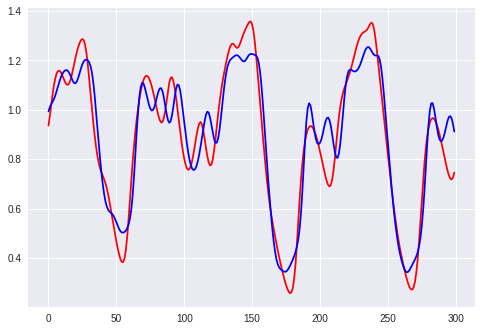

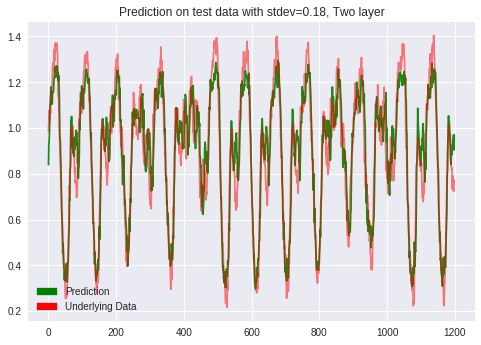

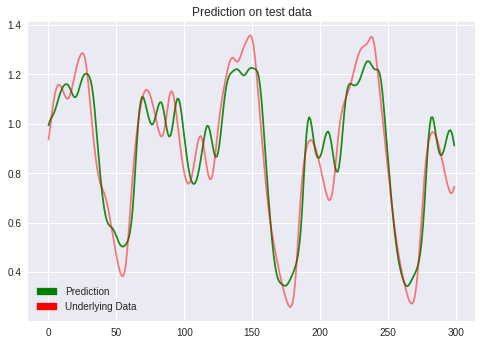

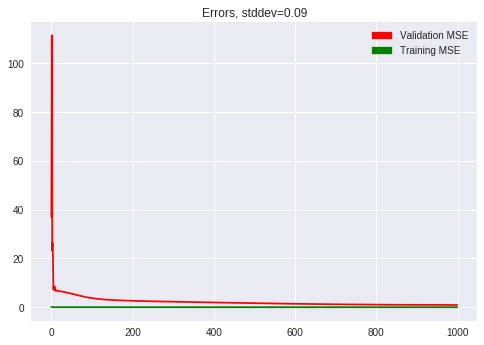

0.9178956345739409


'\n\n'

In [7]:
from __future__ import print_function

import tensorflow as tf
import time



# Parameters
learning_rate = 0.005
training_epochs = 1000
batch_size = 100
display_step = 100
momentum=0.9
errorEstimation = 0.3


# Two or three dimensions
NumLayers_Three = True
# Momentum
UseMomentum = True
# Batch or total learn
BatchLearn = True

if(BatchLearn):
    batchN = int(len(training_x)/batch_size)
    batchData_X = np.split(training_x,batchN)
    batchData_Y = np.split(training_y,batchN)
    
    batchData_X_gauss = np.split(training_x_gauss,batchN)
    batchData_Y_gauss = np.split(training_y_gauss,batchN)
else:
  batchN = 1
  
# Network Parameters
n_hidden_1 = 8 # 1st layer number of neurons
n_hidden_2 = 8 # 2nd layer number of neurons
n_input = 5    # Data input
n_classes = 1  # Number of classes

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
if(NumLayers_Three):
  weights = {
      'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
      'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
      'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
  }
  biases = {
      'b1': tf.Variable(tf.random_normal([n_hidden_1])),
      'b2': tf.Variable(tf.random_normal([n_hidden_2])),
      'out': tf.Variable(tf.random_normal([n_classes]))
  }
else:
  weights = {
      'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
      'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
  }
  biases = {
      'b1': tf.Variable(tf.random_normal([n_hidden_1])),
      'out': tf.Variable(tf.random_normal([n_classes]))
  }


# Create model
def multilayer_perceptron(x):
  if(NumLayers_Three):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['h1']), biases['b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['h2']), biases['b2']))
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  else:
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
  return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer

loss_op = tf.losses.mean_squared_error( labels=Y,predictions=logits)
if(UseMomentum):
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=momentum)
else:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
train_op = optimizer.minimize(loss_op)
valid_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()
Global_s=[]

avg_cost_arr = []
final_output_arr1 = []
final_output_arr2 = []
final_output_arr3 = []

training = []
validation = []

saver = tf.train.Saver()

errVal = 0

timePlot = []

if(True):
  with tf.Session() as sess:
      sess.run(init)
      
      # TODO:
      # *Batch learning
      # early stopping based on the error estimate on the hold-out validation data subset ???
      # *Some regularisation techniques (weight decay, momentum) (momentum optimzer )
      # *You will be asked to evaluate both two- and threelayer perceptrons with varying number of nodes in the hidden layers
     
      # Training cycle
      for epoch in range(training_epochs): #
        start = time.time()
        
        
        if(BatchLearn):
          
          # Loop over all batches
          for i in range(batchN):
              avg_cost = 0
              # Run optimization op (backprop) and cost op (to get loss value) 
              _, c = sess.run([train_op, loss_op], feed_dict={X: batchData_X_gauss[i],Y: batchData_Y_gauss[i]})
              # Compute average loss
              avg_cost += c / batchN
              
          
        else:
          
          # Do not use batch
          _, c = sess.run([train_op, loss_op], feed_dict={X: training_x_gauss,Y: training_y_gauss})
          avg_cost = c  #Mean squared error
        
        end =  time.time() - start
        #print(end)
        timePlot.append(end)
        avg_cost_arr.append(avg_cost) 
        
       # if(epoch % display_step == 0 ):
            
        output_validation = sess.run(logits,feed_dict={X: validation_x_gauss})
        error_validation = np.sum((output_validation-validation_y_gauss)**2)*(0.5)
        
        validation.append(error_validation)
        
        if(0 < validation[epoch]-validation[epoch-1]) and (epoch>1000) : 
          print("early stop at ", epoch)
          break
       
        
          
      final_output_arr1 = sess.run(logits, feed_dict={X: training_x}) 
      final_output_arr2 = sess.run(logits, feed_dict={X: test_x}) 
      final_output_arr3 = sess.run(logits, feed_dict={X: validation_x}) 
  
      final_output_gauss = sess.run(logits, feed_dict={X: y_gauss}) 
    
      final_test = sess.run(logits, feed_dict={X: test_x}) 


print("average time of epoch of")
print("avg" , np.round(np.average(timePlot),4))
print("max" , np.round(np.max(timePlot),4))
print("min" , np.round(np.min(timePlot),4))

plt.plot(test_y, c='r')
plt.plot(final_test, c='b')
plt.show()
    
if(True):    
  plt.figure(1)
  plt.plot(final_output_gauss[301:1500], color='g', alpha=0.9)
  plt.plot(label_gauss[301:1500], color='r', alpha=0.5)
  plt.title('Prediction on test data with stdev=0.18, Two layer')
  green = mpatches.Patch(color='green', label='Prediction')
  red = mpatches.Patch(color='red', label='Underlying Data')
  plt.legend(handles=[green,red])
if(True):




  ### Plot the graph
  ##gurk = np.concatenate((final_output_arr1,final_output_arr2), axis = 0)
  #gurk2 = np.concatenate((gurk,final_output_arr3), axis = 0)

  #turk = np.concatenate((training_y,validation_y), axis = 0)
  #turk2 = np.concatenate((turk,test_y), axis = 0)

  plt.figure(2)
  plt.plot(final_output_arr2, color='g',alpha=0.9)
  plt.plot(test_y,color='r',alpha=0.5)
  plt.title('Prediction on test data')
  green = mpatches.Patch(color='green', label='Prediction')
  red = mpatches.Patch(color='red', label='Underlying Data')
  plt.legend(handles=[green,red])
  
  
  #plt.plot(training_y)
  
  if(False):
    gurk = np.concatenate((final_output_arr1,final_output_arr2), axis = 0)
    gurk2 = np.concatenate((gurk,final_output_arr3), axis = 0)

    turk = np.concatenate((training_y,validation_y), axis = 0)
    turk2 = np.concatenate((turk,test_y), axis = 0)
    plt.plot(gurk2 ,'black', lw=0.5, alpha=0.6)

    black = mpatches.Patch(color='black', label='Prediction')
    blue = mpatches.Patch(color='blue', label='Underlying Data')
    plt.legend(handles=[black,blue])

    for i in range(len(gurk2)): # 
      color = 'r'
      if(i < 700):
        color='b'
      elif(i > 700 and i < 900):
        color='r'
      else:
        color='g'

      plt.scatter(i,gurk2[i],c=color, s=3, zorder=10, alpha=0.9)

  ## END OF PLOTTING  

plt.figure(3)
plt.plot(validation,'r')
plt.plot(avg_cost_arr,'g')
plt.title('Errors, stddev=0.09')  

red = mpatches.Patch(color='red', label='Validation MSE')
green = mpatches.Patch(color='green', label='Training MSE')
plt.legend(handles=[red,green])
plt.show()
    
  
print(error_validation)  
#np.concatenate((a,b), axis=0)
#print(gurk)        
""" 
4.3.1
1.  Data generation* and plotting the resulting time series.
2.  Training a neural network for dierent congurations (e.g., the number of hidden nodes, strength of regularisation etc.) with the use of early stopping 
    and a regularisation technique of your own choice.
3.  Validation of dierent network congurations and estimation of the generalisation error on a hold-out validation set, 
    comparing dierent models and selecting one for further evaluation. What is the eect of regularisation
    strength and the number of hidden nodes on the validation performance?
4.  Final evaluation of the selected model on a test set - the conclusive estimate of the generalisation error on the unseen data subset. 
    Plotting these test predictions along with the known target values (and/or plotting the
    difference between the predictions made by your multi-layer perceptron and the corresponding true time series samples).
"""

"""
4.3.2
1.  Examine how the validation prediction performance (estimated on a holdout set) depends on the number of nodes in the second hidden layer for
    different amount of noise (experiment with three values of the std dev of the additive Gaussian noise,  = 0.03, 0.09 and 0.18). 
    Are there any strong trends or particular observations to report?
2.  What is the effect of regularisation? How does the regularisation parameter interact with the amount of noise 
    (as the amount of noise increases, are there any incentives to change the regularisation paremeter)?
3.  For each confguration of noise choose the best three-layer model. Then compare the selected models with the two-layer network in the first task
    (trained here from scratch on the corresponding noisy data) in terms of generalisation error estimated on the evaluation test set. 
    Is any of the two networks superior irrespective of the amount of noise? Discuss the effect of noise on the generalisation performance.
4.  What is the computation cost (time) of backprop learning involved in scaling the network size 
    (from two- to three-layer perceptron and for threelayer perceptrons with varying number of hidden nodes)?

"""

"""

"""


[ 8.32304343 -2.75703959]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


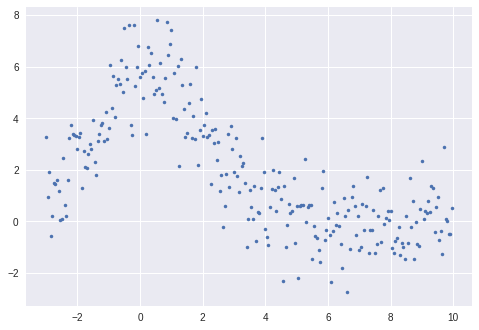

In [2]:
import pylab as pl
import numpy as np

x = np.arange(-3,10,0.05)
y = 2.5 * np.exp(-(x)**2/9) + 3.2 * np.exp(-(x-0.5)**2/4) + np.random.normal(0.0, 1.0, len(x))
nParam = 2
A = np.zeros((len(x),nParam), float)
A[:,0] = np.exp(-(x)**2/9)
A[:,1] = np.exp(-(x*0.5)**2/4)
(p, residuals, rank, s) = np.linalg.lstsq(A,y)

print (p)
pl.ion()
pl.plot(x,y,'.')
pl.plot(x,p[0]*A[:,0]+p[1]*A[:,1],'x')

pl.show()

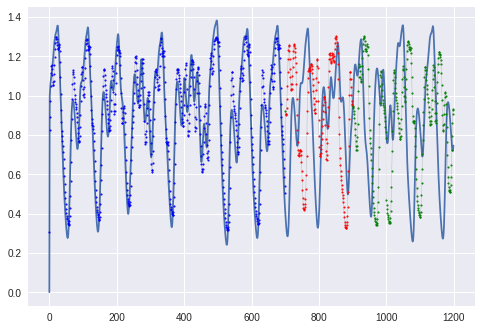